# Regressing 1D Data with a Single Neuron

This notebook provides you with a complete code
example that loads the data contained in `data_reg_1d_clean.csv`, trains a neuron to fit them, and finally uses the trained neuron to predict the values of the data in `data_reg_1d_clean_test.csv`.

## Loading the Data

In [1]:
from loader import load_data

(x, y_gt) = load_data(filename="data_reg_1d_nonlinear.csv")

print("x:", x)
print("y_gt:", y_gt)

x: [[-0.66328127]
 [-0.19952952]
 [ 0.91369553]
 [ 1.51545701]
 [-0.72826599]
 [-0.68957772]
 [-0.26732749]
 [-0.0595261 ]
 [ 1.16141758]
 [ 0.22823167]
 [-1.27072773]
 [ 1.40667259]
 [ 0.34459257]
 [-0.46928324]
 [ 0.76608534]
 [-0.53529957]
 [ 0.2569357 ]
 [ 0.34138958]
 [ 1.46217009]
 [-1.01929787]]
y_gt: [[-0.97032289]
 [-0.38855149]
 [ 0.9672598 ]
 [ 0.11045281]
 [-0.99347893]
 [-0.98169302]
 [-0.5095442 ]
 [-0.11877118]
 [ 0.7302976 ]
 [ 0.4407763 ]
 [-0.5647557 ]
 [ 0.32238458]
 [ 0.63590851]
 [-0.80671179]
 [ 0.99925412]
 [-0.87748801]
 [ 0.49155232]
 [ 0.6309516 ]
 [ 0.21554751]
 [-0.89256274]]


## Visualizing the Data

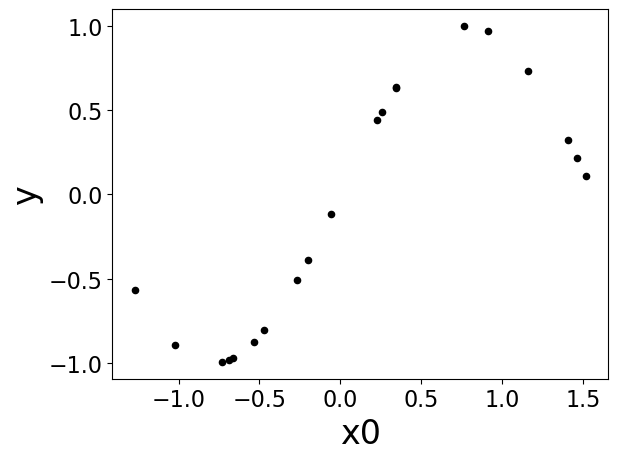

In [2]:
from plotting import plot_data_1d

plot_data_1d(x, y_gt, fig_name="fig_02_05a.pdf")  ### plot_data_1d(x, y_gt)

## Implementing a Single Neuron

Create a single neuron with one scalar weigth `w0` and one input `x` (which can be a scalar or a vector corresponding to multiple inputs) ...

In [3]:
def neuron_reg_1d(w0, x):
    """Artificial neuron for 1D regression."""
    return w0 * x

... randomly initialize its weight ...

In [4]:
from numpy.random import default_rng

rng = default_rng()
w0 = rng.standard_normal()

... obtain its predition `y_p` for the input data (which has the same shape as `x`) ...

In [5]:
y_p = neuron_reg_1d(w0, x)

... and visualize its predictions.

In [6]:
from plotting import plot_pred_1d

### plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x))

## Training the Neuron

Train the neuron ...

In [7]:
num_samples = len(x)
num_train_iterations = 100
eta = .1 # Learning rate.

for i in range(num_train_iterations):
    selected = rng.integers(0, num_samples) # Select random sample.
    x0_selected = x[selected]
    y_gt_selected = y_gt[selected]
    
    y_p_selected = neuron_reg_1d(w0, x0_selected) # Neuron prediction.
    
    error = y_p_selected - y_gt_selected # Calculate error.
    
    w0 -= eta * error * x0_selected # Update neuron weight.

    print(f"i={i} w0={w0[0]:.2f} error={error[0]:.2f}")

i=0 w0=-0.55 error=1.39
i=1 w0=-0.52 error=-0.82
i=2 w0=-0.51 error=0.49
i=3 w0=-0.46 error=1.05
i=4 w0=-0.44 error=0.63
i=5 w0=-0.35 error=1.32
i=6 w0=-0.32 error=-0.76
i=7 w0=-0.32 error=0.14
i=8 w0=-0.23 error=1.23
i=9 w0=-0.19 error=0.92
i=10 w0=-0.11 error=1.11
i=11 w0=-0.04 error=1.06
i=12 w0=0.01 error=0.90
i=13 w0=0.03 error=-0.63
i=14 w0=0.10 error=0.97
i=15 w0=0.17 error=0.92
i=16 w0=0.19 error=-0.58
i=17 w0=0.25 error=-0.85
i=18 w0=0.21 error=0.28
i=19 w0=0.27 error=-0.48
i=20 w0=0.28 error=-0.42
i=21 w0=0.34 error=0.79
i=22 w0=0.34 error=0.10
i=23 w0=0.40 error=-0.66
i=24 w0=0.45 error=0.49
i=25 w0=0.48 error=0.60
i=26 w0=0.52 error=-0.53
i=27 w0=0.42 error=0.68
i=28 w0=0.46 error=0.65
i=29 w0=0.47 error=-0.37
i=30 w0=0.51 error=0.66
i=31 w0=0.52 error=0.29
i=32 w0=0.41 error=0.67
i=33 w0=0.43 error=-0.49
i=34 w0=0.48 error=0.68
i=35 w0=0.50 error=0.58
i=36 w0=0.51 error=0.37
i=37 w0=0.44 error=0.54
i=38 w0=0.49 error=-0.57
i=39 w0=0.50 error=0.38
i=40 w0=0.55 error=-0.62
i

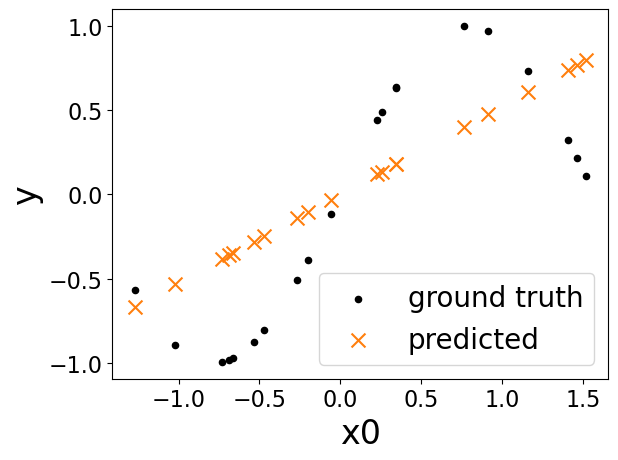

In [8]:
plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x), fig_name="fig_02_05b.pdf")  ### plot_pred_1d(x, y_gt, y_p=neuron_reg_1d(w0, x))

## Testing the Trained Neuron

Check how the trained neuron works on the test data.

In [9]:
### (x_test, y_gt_test) = load_data(filename="data_reg_1d_clean_test.csv")

### plot_pred_1d(x_test, y_gt_test, y_p=neuron_reg_1d(w0, x_test))